In [10]:
import cmocean as cmo
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import xarray as xr

from netCDF4 import Dataset
from xmitgcm import open_mdsdataset
import time

In [2]:
SVB = xr.open_dataset('curtain_SSH_SVB_Barotropic.nc')
noSVB = xr.open_dataset('curtain_SSH_NoSVB_Barotropic.nc')

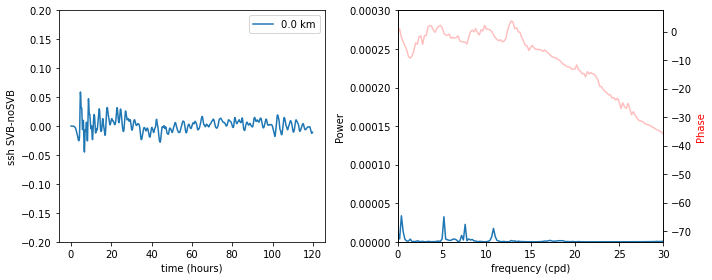

3.247925060122609e-05
5.2
2.254387632896175e-05
7.6
1.7428359016080597e-05
10.8


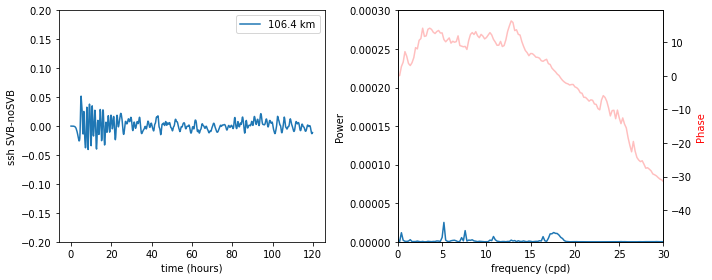

2.512632002857814e-05
5.2
1.4487236536218933e-05
7.6
6.8507986183601664e-06
10.8


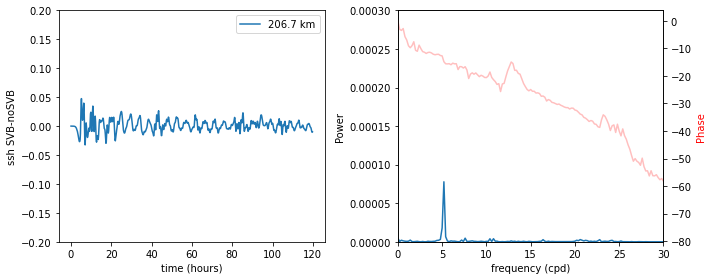

7.779865973262541e-05
5.2
4.733002053396412e-06
7.6
4.004749886527598e-06
10.8


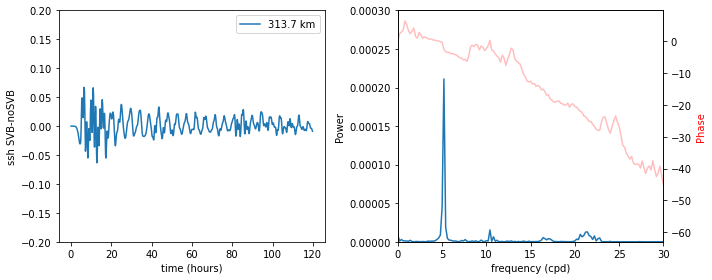

0.00021109922350416837
5.2
2.8531407215555156e-06
7.6
1.535604419824664e-05
10.4


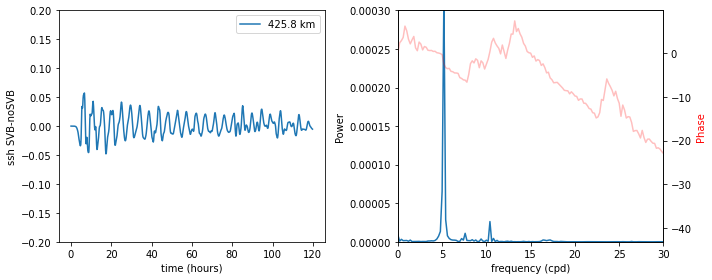

0.00031774365434493153
5.2
1.102553646807025e-05
7.6
2.6243521771192868e-05
10.4


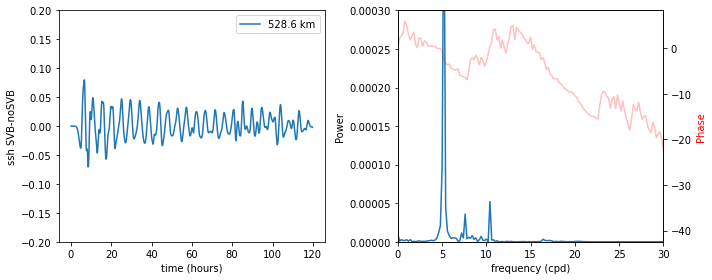

0.00048410435306820245
5.2
3.6006826952014895e-05
7.6
5.226790287646825e-05
10.4


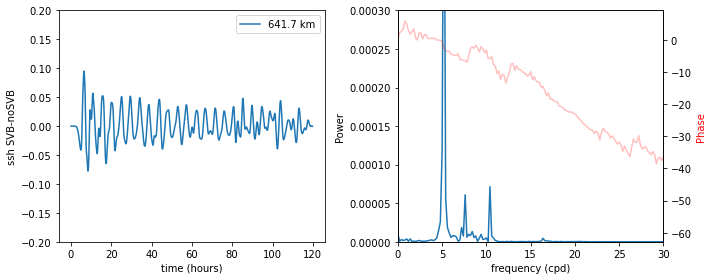

0.000601151846693159
5.2
6.094401577717043e-05
7.6
7.154967471278606e-05
10.4


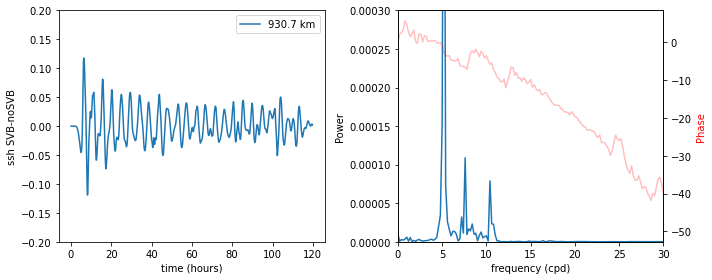

0.0007743950081079451
5.2
0.00010892161016961588
7.6
7.905303833073906e-05
10.4


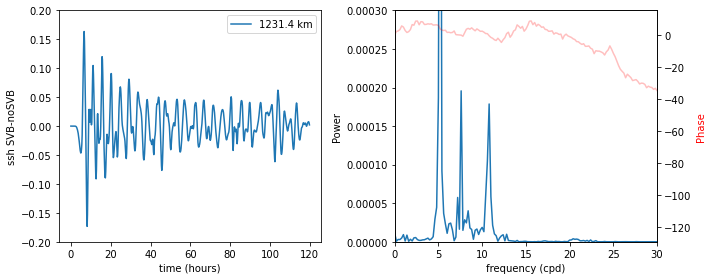

0.0009775803578163272
5.2
0.00019568283597301317
7.6
0.0001786647129977915
10.8


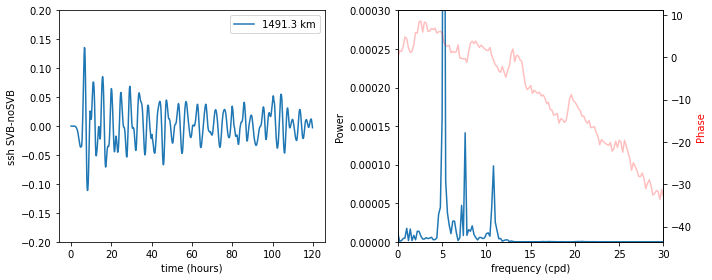

0.0008536051344706982
5.2
0.00014132499450212908
7.6
9.840665237602209e-05
10.8


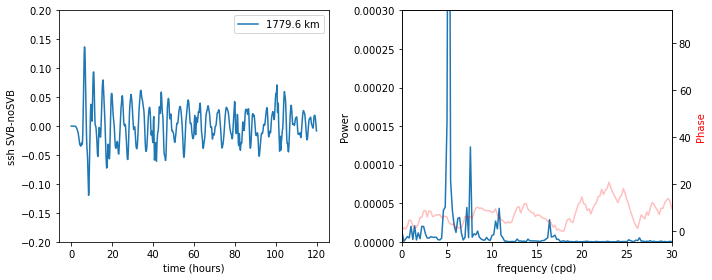

0.0008268129509564319
5.2
0.00012300994452160775
7.6
4.333636266707221e-05
10.8


In [3]:
timeseries = (SVB.curtain_data.data-noSVB.curtain_data.data)*100 # in cm
samp_freq = 1/600 # 10 min data
X = SVB.X[:]
indices = [0,50,100,150,200,250,300,350,400,450,500]

# Generate a model signal
t0 = 0
dt = 600
freq = (1./dt)

t = np.linspace( t0, t0+720*dt, 720, endpoint=False )

for ii in indices:
    signal = timeseries[:,ii]

    ## Fourier transform of real valued signal
    signalFFT = np.fft.rfft(signal)

    ## Get Power Spectral Density
    signalPSD = np.abs(signalFFT) ** 2
    signalPSD /= len(signalFFT)**2

    ## Get Phase
    signalPhase = np.angle(signalFFT)

    # And now, the graphics -------------------

    ## Get frequencies corresponding to signal 
    fftFreq = np.fft.rfftfreq(len(signal), dt)

    plt.figure( figsize=(10, 4) )

    ax1 = plt.subplot( 1, 2, 1 )
    ax1.plot( t/(3600), signal, label='%1.1f km' %X[ii])
    ax1.set_ylabel( 'ssh SVB-noSVB' )
    ax1.set_xlabel( 'time (hours)' )
    ax1.legend()

    ax2 = plt.subplot( 1, 2, 2 )
    ax2.plot( fftFreq*(86400), signalPSD )
    ax2.set_ylabel( 'Power' )
    ax2.set_xlabel( 'frequency (cpd)' )

    ax2b = ax2.twinx()
    ax2b.plot( fftFreq*(86400), np.unwrap(signalPhase), alpha=0.25, color='r' )
    ax2b.set_ylabel( 'Phase', color='r' )

    ax2.set_xlim(0,30)
    ax2b.set_xlim(0,30)
    ax2.set_ylim(0,0.0003)
    ax1.set_ylim(-0.20,0.2)
    
    plt.tight_layout()
    
    plt.show()
    print(np.max(signalPSD[20:30])) # find max PSD for peak 1 (these limits shouldn't be hard coded!)
    print(fftFreq[np.argmax(signalPSD[20:30])+20]*86400) # find corresponding frequency
        
    print(np.max(signalPSD[34:45])) # find max PSD for peak 2
    print(fftFreq[np.argmax(signalPSD[34:45])+34]*86400)
        
    print(np.max(signalPSD[47:59])) # find max PSD for peak 3
    print(fftFreq[np.argmax(signalPSD[47:59])+47]*86400)


### With SVB

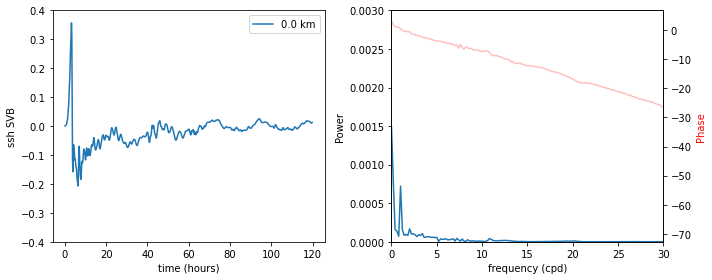

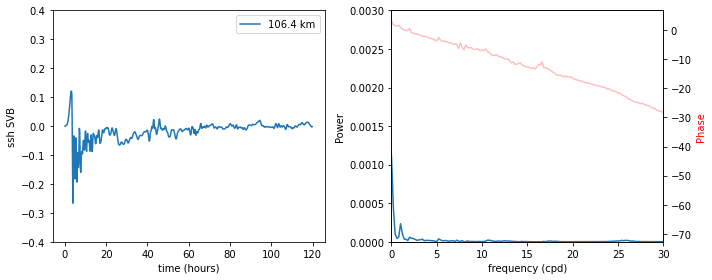

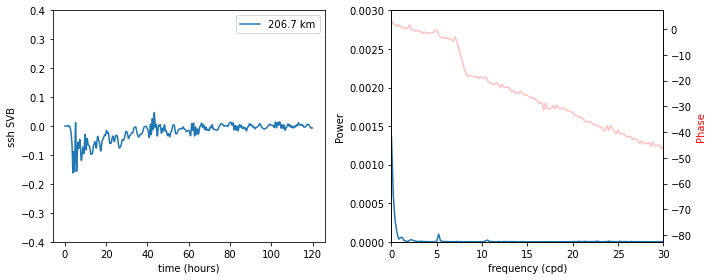

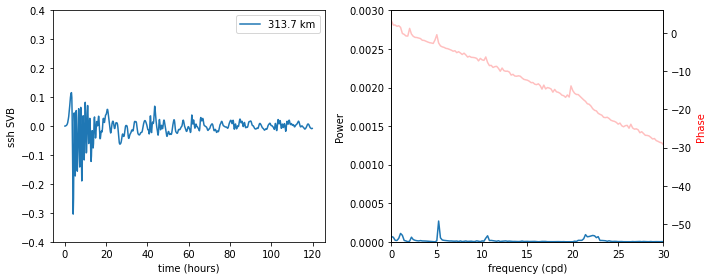

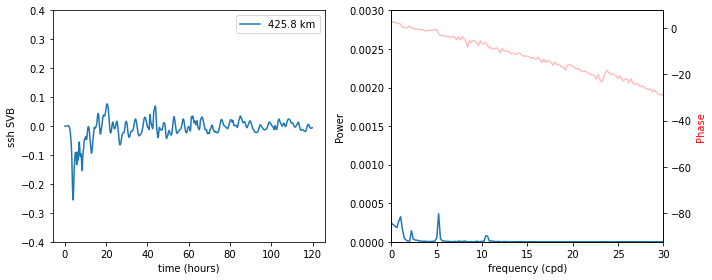

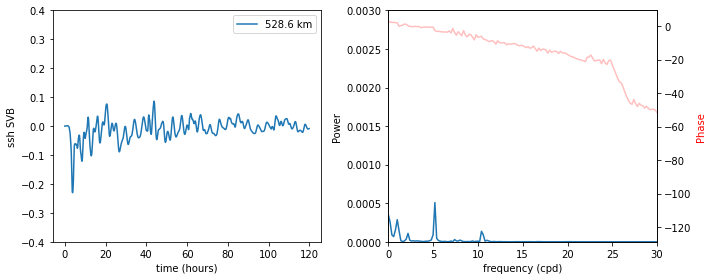

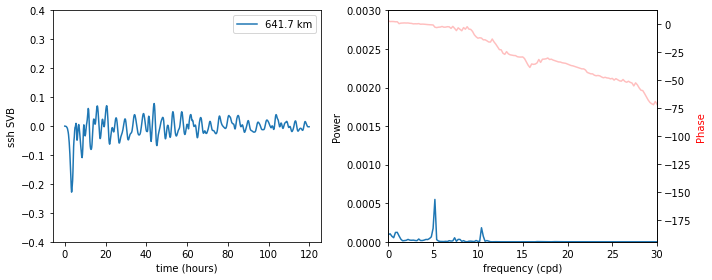

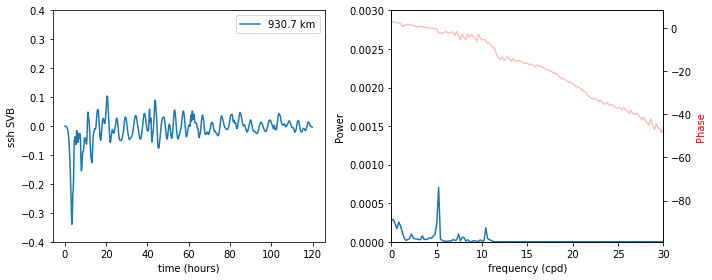

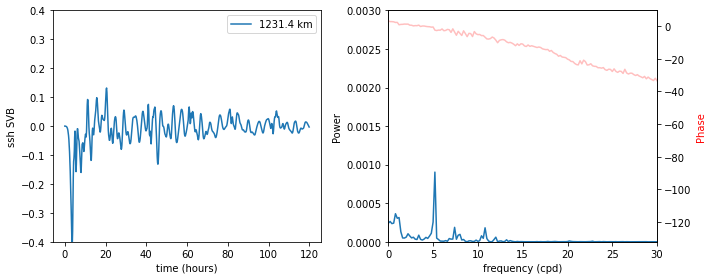

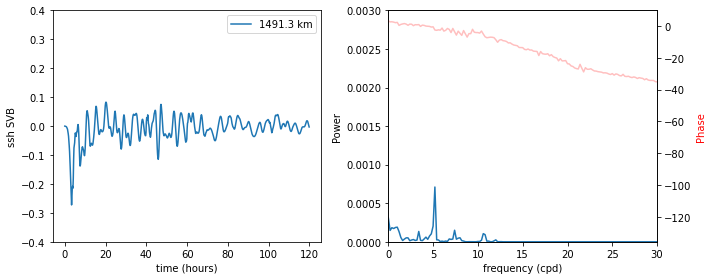

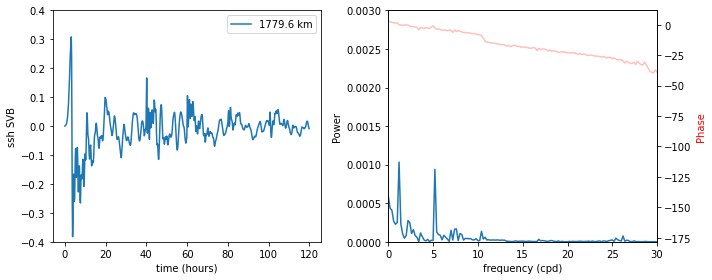

In [4]:
timeseries = (SVB.curtain_data.data)*100 # in cm
samp_freq = 1/600 # 10 min data
X = SVB.X[:]
indices = [0,50,100,150,200,250,300,350,400,450,500]

# Generate a model signal
t0 = 0
dt = 600
freq = (1./dt)

t = np.linspace( t0, t0+720*dt, 720, endpoint=False )

for ii in indices:
    signal = timeseries[:,ii]

    ## Fourier transform of real valued signal
    signalFFT = np.fft.rfft(signal)

    ## Get Power Spectral Density
    signalPSD = np.abs(signalFFT) ** 2
    signalPSD /= len(signalFFT)**2

    ## Get Phase
    signalPhase = np.angle(signalFFT)

    # And now, the graphics -------------------

    ## Get frequencies corresponding to signal 
    fftFreq = np.fft.rfftfreq(len(signal), dt)

    plt.figure( figsize=(10, 4) )

    ax1 = plt.subplot( 1, 2, 1 )
    ax1.plot( t/(3600), signal, label='%1.1f km' %X[ii])
    ax1.set_ylabel( 'ssh SVB' )
    ax1.set_xlabel( 'time (hours)' )
    ax1.legend()

    ax2 = plt.subplot( 1, 2, 2 )
    ax2.plot( fftFreq*(86400), signalPSD )
    ax2.set_ylabel( 'Power' )
    ax2.set_xlabel( 'frequency (cpd)' )

    ax2b = ax2.twinx()
    ax2b.plot( fftFreq*(86400), np.unwrap(signalPhase), alpha=0.25, color='r' )
    ax2b.set_ylabel( 'Phase', color='r' )

    ax2.set_xlim(0,30)
    ax2b.set_xlim(0,30)
    ax2.set_ylim(0,0.003)
    ax1.set_ylim(-0.4,0.4)
    
    plt.tight_layout()

    plt.show()

### No SVB

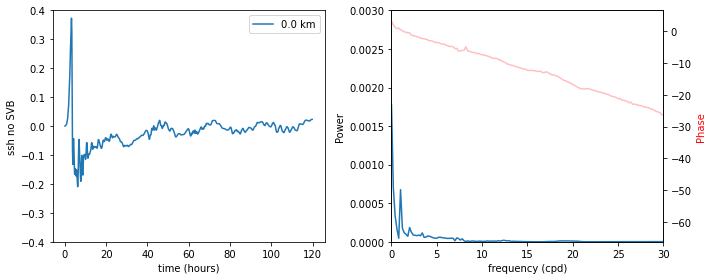

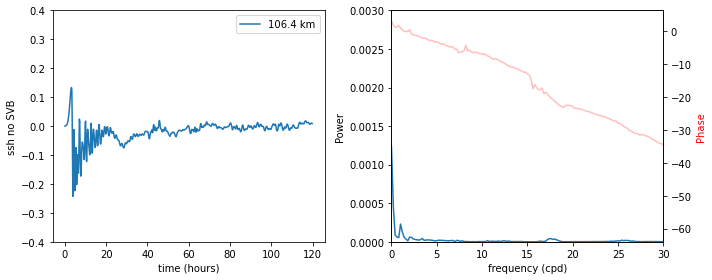

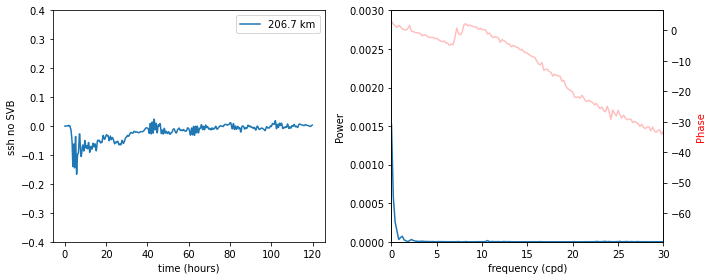

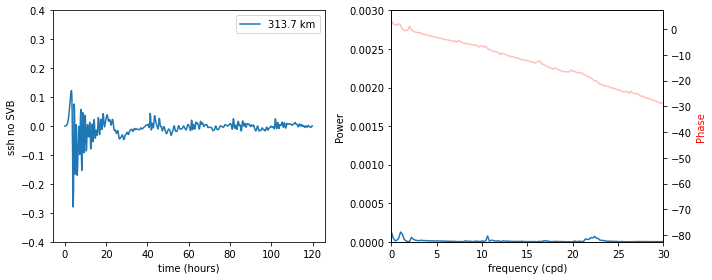

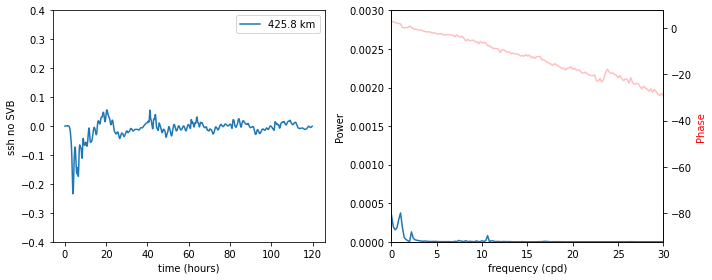

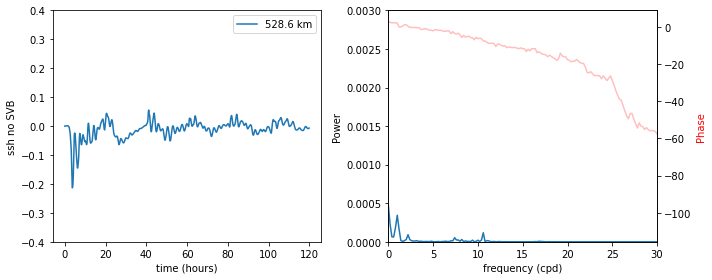

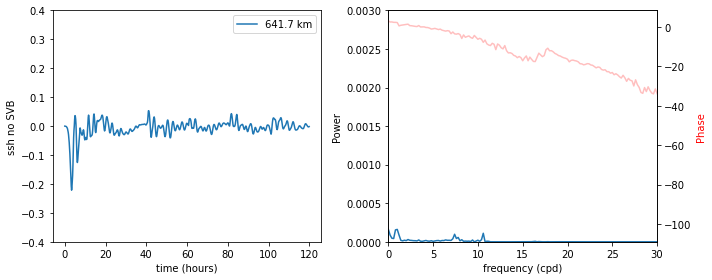

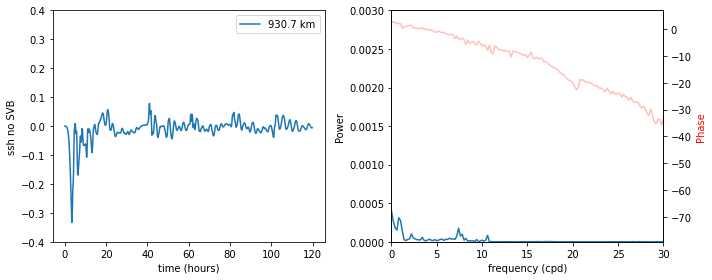

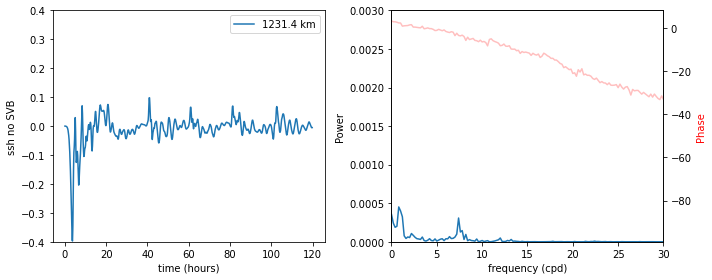

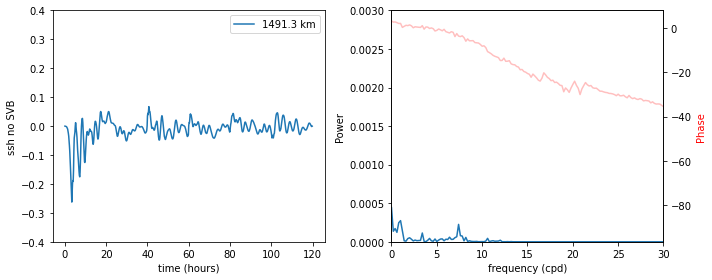

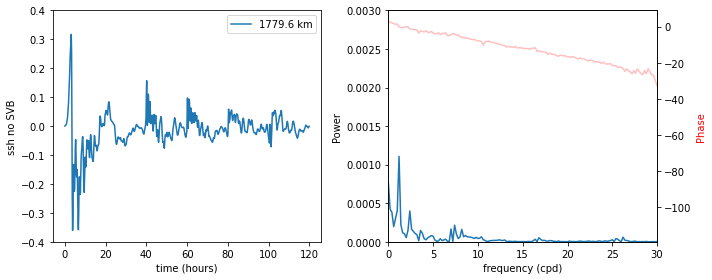

In [5]:
timeseries = (noSVB.curtain_data.data)*100 # in cm
samp_freq = 1/600 # 10 min data
X = SVB.X[:]
indices = [0,50,100,150,200,250,300,350,400,450,500]


# Generate a model signal
t0 = 0
dt = 600
freq = (1./dt)

t = np.linspace( t0, t0+720*dt, 720, endpoint=False )

for ii in indices:
    signal = timeseries[:,ii]

    ## Fourier transform of real valued signal
    signalFFT = np.fft.rfft(signal)

    ## Get Power Spectral Density
    signalPSD = np.abs(signalFFT) ** 2
    signalPSD /= len(signalFFT)**2

    ## Get Phase
    signalPhase = np.angle(signalFFT)

    # And now, the graphics -------------------

    ## Get frequencies corresponding to signal 
    fftFreq = np.fft.rfftfreq(len(signal), dt)

    plt.figure( figsize=(10, 4) )

    ax1 = plt.subplot( 1, 2, 1 )
    ax1.plot( t/(3600), signal, label='%1.1f km' %X[ii])
    ax1.set_ylabel( 'ssh no SVB' )
    ax1.set_xlabel( 'time (hours)' )
    ax1.legend()

    ax2 = plt.subplot( 1, 2, 2 )
    ax2.plot( fftFreq*(86400), signalPSD )
    ax2.set_ylabel( 'Power' )
    ax2.set_xlabel( 'frequency (cpd)' )

    ax2b = ax2.twinx()
    ax2b.plot( fftFreq*(86400), np.unwrap(signalPhase), alpha=0.25, color='r' )
    ax2b.set_ylabel( 'Phase', color='r' )

    ax2.set_xlim(0,30)
    ax2b.set_xlim(0,30)
    ax2.set_ylim(0,0.003)
    ax1.set_ylim(-0.4,0.4)
    
    plt.tight_layout()

    plt.show()

### Spatial structure

In [6]:
outdir = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL_SVB/02_SVB_barotropic_output'
outdir2 = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL/02_noSVB_barotropic/'

ds = open_mdsdataset(outdir, prefix=['eta'])
ds2 = open_mdsdataset(outdir2, prefix=['eta'])

In [7]:
LAT = ds2['YC'][:]
LON = ds2['XC'][:]-360
lat = ds2.YC[:,0].data
lon = ds2.XC[0,:].data-360

nx = len(lon)
ny = len(lat)

# centers mask
hFacC = ds2['hFacC'][:]
hfac = np.ma.masked_values(hFacC, 0)
mask = np.ma.getmask(hfac)

# depth with bay
depth = ds['Depth'][:]

In [8]:
filename = 'ssh_spectra_phase_3peaks_barotropic_cm.nc'
filename2 = 'ssh_spectra_3peaks_barotropic_cm.nc'
sshData = xr.open_dataset(filename)
sshData2 = xr.open_dataset(filename2)

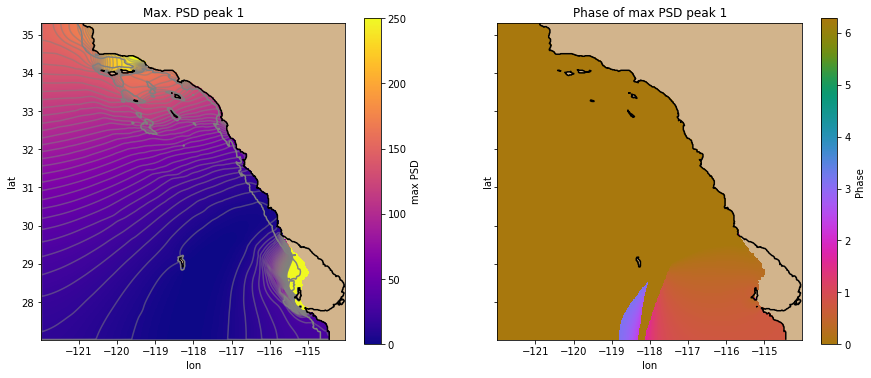

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,6), sharey=True)
ax1.set_facecolor('tan')
pc1 = ax1.pcolormesh(lon,lat, sshData2.p1_psd, cmap='plasma', vmin=0, vmax=250)
plt.colorbar(pc1, ax=ax1, label='max PSD')
levels=np.arange(0,250,5)
cn1 = ax1.contour(lon,lat, sshData2.p1_psd, levels, colors='0.5', alpha=0.5)

ax1.contour(lon,lat,depth,levels=[0, 250], colors=['k','0.5','0.5','0.5','0.5','0.5'])

ax1.set_xlabel('lon')
ax1.set_ylabel('lat')
ax1.set_title('Max. PSD peak 1')
ax1.set_aspect(1)

ax2.set_facecolor('tan')
pc2 = ax2.pcolormesh(lon, lat, sshData.p1_phase, cmap=cmo.cm.phase, vmin=0, vmax=2*np.pi)
plt.colorbar(pc2, ax=ax2, label='Phase')
ax2.contour(lon,lat,depth,levels=[0], colors=['k'])
ax2.set_xlabel('lon')
ax2.set_ylabel('lat')
ax2.set_title('Phase of max PSD peak 1')
ax2.set_aspect(1)


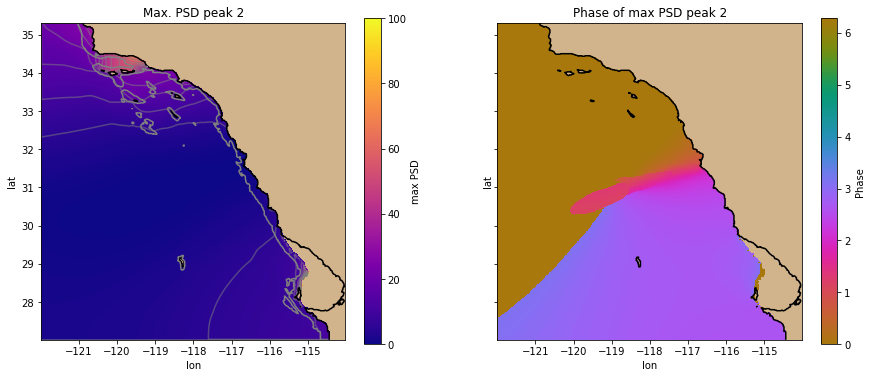

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,6), sharey=True)
ax1.set_facecolor('tan')
pc1 = ax1.pcolormesh(lon,lat, sshData2.p2_psd, cmap='plasma', vmin=0, vmax=100)
plt.colorbar(pc1, ax=ax1, label='max PSD')
levels=np.arange(0,250,5)
cn1 = ax1.contour(lon,lat, sshData2.p2_psd, levels, colors='0.5', alpha=0.5)

ax1.contour(lon,lat,depth,levels=[0, 250], colors=['k','0.5','0.5','0.5','0.5','0.5'])

ax1.set_xlabel('lon')
ax1.set_ylabel('lat')
ax1.set_title('Max. PSD peak 2')
ax1.set_aspect(1)

ax2.set_facecolor('tan')
pc2 = ax2.pcolormesh(lon, lat, sshData.p2_phase, cmap=cmo.cm.phase, vmin=0, vmax=2*np.pi)
plt.colorbar(pc2, ax=ax2, label='Phase')
ax2.contour(lon,lat,depth,levels=[0], colors=['k'])
ax2.set_xlabel('lon')
ax2.set_ylabel('lat')
ax2.set_title('Phase of max PSD peak 2')
ax2.set_aspect(1)


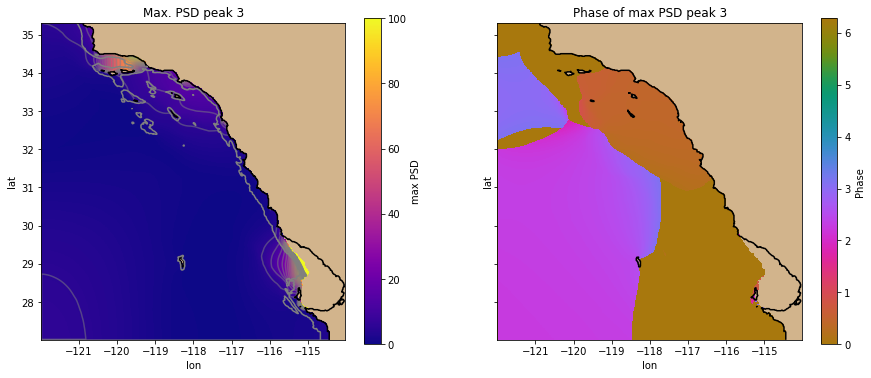

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,6), sharey=True)
ax1.set_facecolor('tan')
pc1 = ax1.pcolormesh(lon,lat, sshData2.p3_psd, cmap='plasma', vmin=0, vmax=100)
plt.colorbar(pc1, ax=ax1, label='max PSD')
levels=np.arange(0,250,5)
cn1 = ax1.contour(lon,lat, sshData2.p3_psd, levels, colors='0.5', alpha=0.5)

ax1.contour(lon,lat,depth,levels=[0, 250], colors=['k','0.5','0.5','0.5','0.5','0.5'])

ax1.set_xlabel('lon')
ax1.set_ylabel('lat')
ax1.set_title('Max. PSD peak 3')
ax1.set_aspect(1)

ax2.set_facecolor('tan')
pc2 = ax2.pcolormesh(lon, lat, sshData.p3_phase, cmap=cmo.cm.phase, vmin=0, vmax=2*np.pi)
plt.colorbar(pc2, ax=ax2, label='Phase')
ax2.contour(lon,lat,depth,levels=[0], colors=['k'])
ax2.set_xlabel('lon')
ax2.set_ylabel('lat')
ax2.set_title('Phase of max PSD peak 3')
ax2.set_aspect(1)
